In [2]:
from music21 import converter, note, chord, environment
'''from mingus.containers.note import Note
from mingus.containers.note_container import NoteContainer
from mingus.containers.bar import Bar
from mingus.containers.track import Track
from mingus.containers.composition import Composition
from mingus.containers.instrument import MidiInstrument
from mingus.midi import midi_file_in
import mingus.core.notes as notes
import mingus.core.intervals as intervals'''
import glob
import pandas as pd
import numpy as np
import pickle
from gan import GAN


# Instalamos MuseScore para visualizar la partitura

Indicamamos la ruta

In [12]:
environment.set("musescoreDirectPNGPath", "/Applications/MuseScore 4.app/Contents/MacOS/mscore")

# Cargamos los datos 

In [13]:
def get_notes(files):
    """Obtenemos todas las notas y acordes de cada archivo midi"""
    notes = []
    duration = []


    for file in files:
        midi = converter.parse(file)
        notes_to_parse = midi.flat.notes
        print("Parsing %s" % file)

        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
                duration.append(element.duration.quarterLength)
            elif isinstance(element, chord.Chord):
                notes.append(' '.join(str(n) for n in element.pitches))
                duration.append(element.duration.quarterLength)

    return pd.DataFrame.from_dict({'pitch': notes, 'duration': duration}).drop_duplicates()

In [ ]:
songs = glob.glob('dataset/**/*')
notes = get_notes(songs)

In [15]:
print('Number of files:', len(songs))
notes

Number of files: 262


,pitch,duration
0,B-4,2.0
1,B-3,2.0
2,F4,1.0
3,F3,1.0
4,D4,2.0
...,...,...
296290,C#4 F4 C#5 A4,1.0
296296,B-2,6.75
296332,C6 C5,1/3
296338,B-4 B-5,6.0


# Guardamos

Guardamos en un archivo el objeto notes para no procesarlo cada vez

In [16]:
with open('objects/notes.pickle', 'wb') as f:
    pickle.dump(notes, f)

### GAN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                     

/Users/karladsj/Documents/Semestre I/IA/Miausic/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1 [D loss: 0.690620, acc.: 92.97%] [G loss: 0.693432]
2/2 [==============================] - 0s 2ms/step
2 [D loss: 0.689447, acc.: 90.62%] [G loss: 0.693295]
2/2 [==============================] - 0s 2ms/step
3 [D loss: 0.688322, acc.: 84.38%] [G loss: 0.693355]
2/2 [==============================] - 0s 2ms/step
4 [D loss: 0.688126, acc.: 77.34%] [G loss: 0.693400]
2/2 [==============================] - 0s 2ms/step
5 [D loss: 0.686846, acc.: 80.47%] [G loss: 0.693331]
2/2 [==============================] - 0s 2ms/step
6 [D loss: 0.686255, acc.: 73.44%] [G loss: 0.693020]
2/2 [==============================] - 0s 2ms/step
7 [D loss: 0.685988, acc.: 75.78%] [G loss: 0.692612]
2/2 [==============================] - 0s 4ms/step
8 [D loss: 0.684352, acc.: 72.66%] [G loss: 0.692876]
2/2 [==============================] - 0s 2ms/step
9 [D loss: 0.684240, acc.: 71.09%] [G loss: 0.692298]
2/2 [==============================] - 0s 2ms/step
10 [D loss: 0.683877, acc.: 67.19%] [G loss: 0.692283]


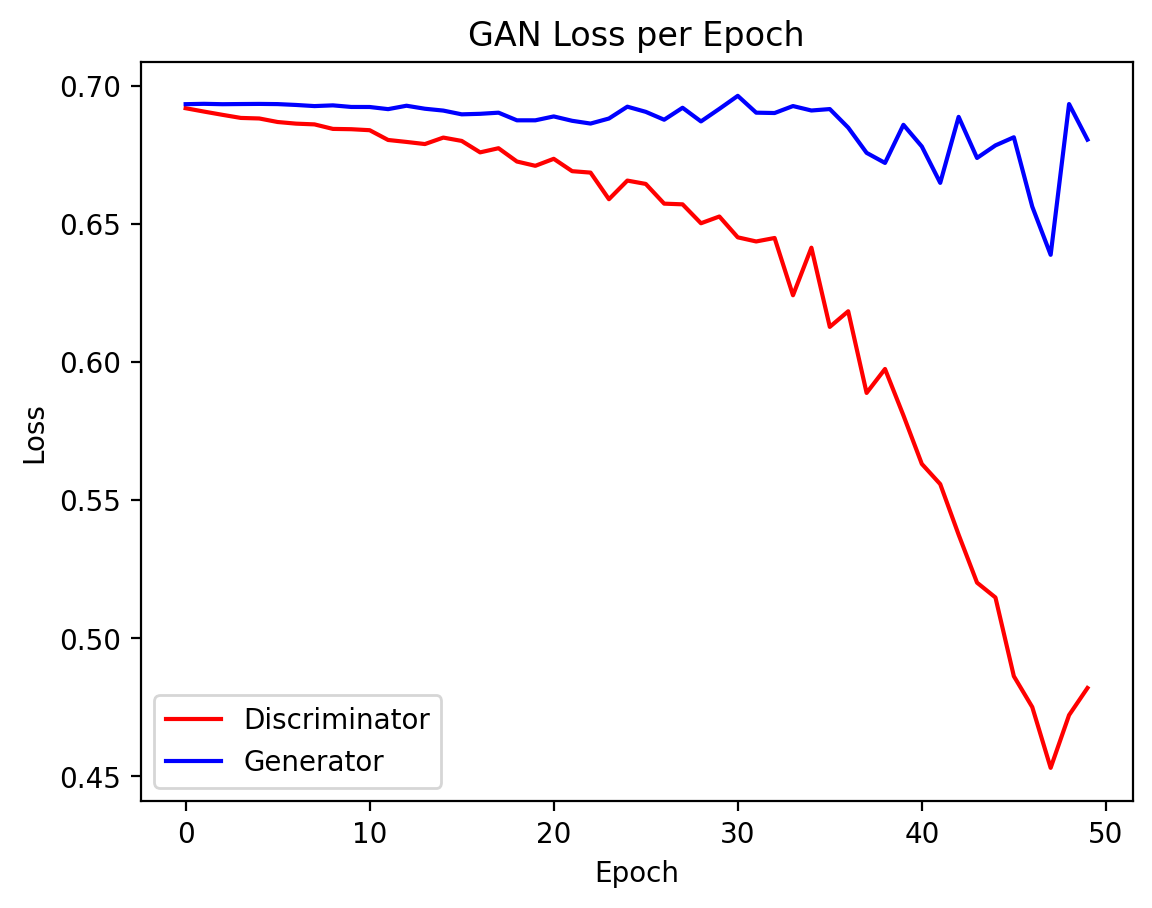

In [5]:
#pickle_file = open('objects/notes.pickle', 'rb')
#lista_fichero = pickle.load(pickle_file)
gan = GAN(notes)
gan.train(50)

# Generamos

In [1]:
from gan_music import *
import mingus.core.scales as scales
from music21 import converter, note, chord, environment
import pandas as pd
import numpy as np
import pickle
from gan import GAN

with open('objects/notes.pickle', 'rb') as f:
    notes = pickle.load(f)
    generated_music = get_music('objects/generator_model.h5', np.array(notes['pitch']),scales.NaturalMinor('C').ascending()+scales.NaturalMinor('C').descending())
    print(generated_music)
    midi_gan = create_midi(generated_music,'4/4', 120,instrument.Piano())
    midi_gan.show('midi')

/Users/karladsj/Documents/Semestre I/IA/Miausic/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
['E b F3', 'G G4', 'F G B5 G#5', 'C F C3 E-3 G3', 'D G A5 F#5 D5', 'E b E b C#6 E-5', 'F D2 D3', 'C B-5', 'B b A4 C#5', 'C C#5 C#4', 'B b G2', 'C C4 F#3', 'B b D4 B-4', 'E b A b B-4 F5', 'F D C#6 B-6', 'C B b B-2 C#3', 'B b C#5 A4', 'F D4 B-3', 'A b G6 E-7', 'A b D B-5 G#5', 'C D3 C#3', 'A2', 'C D3 A2', 'D E b E7 B6', 'A b B-4 B-5', 'G C B-5 E5', 'C G C#5 C#6', 'G G2 C3', 'C E-4 C#4', 'F E5', 'C B6 C#7', 'B b E-4 E-3', 'F F#3', 'F F G#5 E5 C#5', 'A b B-4 F#5', 'D C#7 F6', 'A b C C C#5 A4 E4', 'E b B-4 F#4', 'C C E-3 F2', 'D D3 B2', 'B b G#3 E3', 'G A4 D4', 'A b A3 E3', 'C D F#5 D6 A5', 'C G#5 D5', 'E b D5', 'C B-4 D5', 'C B3 G#3', 'C G4 G5', 'B b C F#2 E-2', 'D F#5', 'F B5', 'B-0', 'C G2 A2', 'C C#6 C#5', 'G E b F#5 B-5', 'C G5', 'F C D4 F#3', 'E b F G3 D4', 'G B-5 G#5', 'C F#3', 'C E-5 C5', 'A b F A5 E5', 'F B2 E-3', 'B b G2', 'C B-5 E5', 'D G5', 'F D4 G3', 'A b A b F5 D5', 'G A b F2 A2', 'C G G5 E5', 'A b C4 G3', 'C F#7 D7', 'B5', '

In [2]:
midi_gan.write('musicxml.pdf', fp='wheretosavethefile.pdf')

PosixPath('/Users/karladsj/Documents/Semestre I/IA/Miausic/models/gan/wheretosavethefile.pdf')

In [9]:
np.array(list(notes['pitch'])+scales.Major('B').ascending())

array(['B-4', 'B-3', 'F4', ..., 'G#', 'A#', 'B'], dtype='<U33')

In [3]:
scales.NaturalMinor('C').ascending()+scales.NaturalMinor('C').descending()

['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb', 'C']

In [4]:
set(scales.NaturalMinor('C').ascending()+scales.NaturalMinor('C').descending())

{'Ab', 'Bb', 'C', 'D', 'Eb', 'F', 'G'}